**DATA SET LINK**
https://drive.google.com/file/d/1_hrnlNDf6NIVAv71Je28Wp47nBISSF9h/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Agenda




*   Underfit and Overfit examples
*   How to use Regularization, Dropout and Early Stopping on Keras 


# Excercise: How to not Overfitting


## Prepare data

In [ ]:
from tensorflow.random import set_seed
set_seed(1612)
import numpy as np
np.random.seed(1612)
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/data_S7.csv'
train_df =  pd.read_csv(os.path.join(DATA_PATH))

In [ ]:
# TODO
# print out first 10 rows of data
train_df.head(10)

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,0.416,-2.177,-0.326,0.340,1.174,-0.245,-1.070,-0.336,-0.502,0.403,-0.605,-0.280,-1.618,0.878,-0.272,0.870,2.171,-0.214,0.477,-2.092,0.835,0.621,-2.810,1.029,-0.736,0.582,-0.079,0.493,...,0.055,1.107,-0.848,-1.781,0.254,-0.515,0.234,0.296,-1.774,2.032,-0.442,-0.116,1.393,-0.494,-0.179,1.874,1.463,-1.397,0.284,0.336,0.551,0.557,-0.522,-0.503,-0.541,1.393,0.506,-1.420,-0.123,-1.833,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,0.542,0.424,-1.572,-0.968,-1.483,0.564,0.047,-0.324,-1.490,0.179,-0.524,0.250,2.462,0.029,-1.399,-2.370,-1.505,-1.294,0.106,-0.145,0.235,-1.045,1.335,1.254,-0.811,1.812,0.181,-0.020,...,0.627,-1.472,0.496,-0.052,0.322,-0.222,1.168,0.931,-0.203,0.321,0.761,1.752,0.181,-3.029,-0.578,-0.260,-0.425,-0.160,-0.497,-0.049,1.097,0.398,0.554,0.578,-0.544,0.441,-0.524,-1.474,-0.090,-0.607,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,-0.017,-0.665,1.905,0.376,-1.373,1.587,1.464,-1.550,-0.512,0.508,-0.094,-0.114,-0.425,0.104,0.643,-1.371,1.553,-0.062,-0.173,-0.465,-1.252,0.443,2.205,-1.266,-0.739,0.827,-1.306,0.274,-1.573,...,-1.610,-0.801,1.557,0.628,-0.072,-0.573,0.507,-1.229,0.313,1.446,-0.345,1.147,-0.623,-0.048,1.456,-0.932,0.666,0.451,0.671,-0.596,-0.135,0.966,-0.167,0.530,-1.493,-0.917,0.120,0.258,-0.405,-0.859,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,-0.638,0.760,-0.360,-2.048,-0.996,-0.361,0.962,0.021,0.595,-0.943,0.069,0.483,-0.063,-0.540,-0.551,-1.736,-2.014,0.636,-1.147,-0.767,-0.678,0.815,1.696,-0.436,-1.777,0.548,0.318,0.978,1.299,...,0.011,1.137,0.499,-0.262,-1.484,0.216,-2.536,0.191,-0.142,1.387,-1.617,-0.662,-2.288,-1.130,0.651,-0.363,0.686,-0.504,1.734,-0.606,0.514,-0.506,-1.294,0.382,-1.119,1.695,-0.775,-1.428,0.231,-0.780,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,-0.499,-0.653,-0.058,-0.046,0.654,-0.697,-1.175,0.720,0.484,0.402,-1.037,1.081,0.716,-0.144,1.720,-1.980,-0.741,-1.493,-0.860,-0.082,0.133,1.084,-0.719,0.198,1.144,1.123,0.435,-0.296,-2.933,...,0.285,-0.464,1.427,0.554,-0.131,-1.425,0.487,0.413,-0.231,1.570,-0.714,0.385,-0.072,0.150,-0.228,0.144,-1.537,0.664,-0.133,0.424,0.926,-0.089,-0.415,0.299,-1.227,-2.578,0.600,2.167,-0.755,-1.265,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
5,5,0.0,0.739,0.211,-0.836,-1.430,-0.291,-0.989,0.091,0.107,-2.313,-1.124,-0.267,0.524,-2.610,-0.488,-0.137,0.481,1.904,-0.032,-0.876,2.536,0.534,-0.425,-0.812,-0.545,0.298,-1.555,-1.222,-0.031,-0.133,-0.007,-0.239,0.072,-0.887,2.014,-0.282,0.007,0.374,1.245,...,0.269,-0.277,-1.591,-0.645,-0.389,1.002,0.762,0.152,0.382,0.102,1.063,0.950,0.170,-0.312,-1.229,-1.191,-0.412,0.200,1.037,-2.199,0.579,-1.228,-0.146,-0.532,0.617,0.979,-0.380,-0.790,-0.300,-0.578,-1.501,-1.960,0.671,0.091,-1.467,-1.011,-0.118,-0.257,-0.337,-1.064
6,6,1.0,1.257,-1.562,0.832,0.432,1.667,0.843,-0.037,-0.960,-0.311,0.173,-0.059,1.744,-0.920,-0.077,-0.818,-2.053,-2.042,0.219,0.508,-0.659,0.063,-0.443,1.086,-2.087,0.227,1.854,0.211,0.172,0.815,-0.013,-0.408,-1.385,1.200,-0.020,0.554,-0.076,0.452,-0.147,...,-0.604,0.566,1.239,0.270,0.588,-0.207,-1.395,-1.579,-0.141,-0.236,-0.538,0.061,0.642,0.118,-0.150,-1.399,-0.423,0.553,-0.857,0.393,0.958,-0.124,1.379,-0.748,0.218,-1.407,-0.739,0.590,0.044,-0.268,0.024,0.391,0.547,-0.416,-0.333,0.857,0.422,-0.833,-1.055,0.439
7,7,0.0,0.668,-0.077,0.014,-1.523,1.207,0.810,-0.879,0.965,-0.181,

In [ ]:
# print out last 10 rows of data
train_df.tail(10)

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
240,240,0.0,1.462,1.680,1.165,-0.394,-1.098,-1.031,0.863,-0.242,1.588,0.265,-0.940,-1.394,-2.262,1.778,-0.471,-0.098,1.305,-0.513,-0.397,1.405,-0.673,0.143,0.216,-0.940,-1.372,0.595,-0.798,-0.793,-1.445,-1.290,0.372,-1.384,1.183,2.406,0.547,-0.606,0.846,-0.022,...,0.691,-0.398,-0.484,-0.373,1.168,0.541,-0.545,0.652,-0.925,-0.905,-0.723,-0.501,0.125,0.826,0.020,-0.331,-0.133,1.101,-0.134,0.359,-0.088,0.494,-0.924,0.026,0.427,-1.740,-0.556,0.598,-2.201,1.031,2.265,-0.906,0.910,1.457,-0.341,0.526,1.073,-0.066,0.917,-0.296
241,241,0.0,-1.448,0.355,1.669,1.771,-0.072,0.005,0.550,-0.437,0.176,0.444,-0.042,-0.183,0.660,-0.746,-0.294,-1.340,-0.448,-0.399,-1.517,0.604,-1.323,-1.415,-0.878,0.049,-2.023,-0.465,0.642,-1.037,-0.229,-0.348,0.047,-0.429,0.480,0.200,-1.294,0.032,0.392,-0.423,...,0.521,0.548,-0.777,-0.441,1.339,-1.803,0.738,0.646,-0.309,-0.651,-0.919,-0.230,-1.336,1.632,-1.131,-0.191,-0.307,0.529,-1.251,-1.409,0.966,-0.480,-0.375,1.534,-0.357,1.256,-0.572,-0.687,-1.186,-0.754,0.333,1.391,0.425,-0.015,0.094,-1.025,0.728,-0.383,-1.827,0.093
242,242,1.0,-1.712,-0.089,1.426,0.262,1.671,1.940,0.064,0.472,1.502,-0.848,-0.743,0.740,-2.111,0.023,-1.122,-0.909,-0.839,-0.841,0.795,2.576,-0.147,0.699,-0.697,0.667,1.115,-1.047,-2.289,0.000,-0.736,-1.224,0.086,1.317,0.188,0.374,-0.438,-1.320,-0.888,-1.322,...,0.386,1.247,-1.192,-1.528,0.935,0.044,-1.545,0.599,0.348,0.329,0.347,-0.630,0.789,-1.910,-0.710,-2.289,0.481,-0.807,-0.565,-0.537,0.696,-0.743,-0.184,0.005,1.003,0.069,0.722,0.057,-1.135,1.113,0.304,2.701,-2.134,1.018,-0.649,-0.779,0.276,-0.136,-1.771,0.437
243,243,0.0,0.936,0.089,-0.215,-0.437,2.180,-1.547,0.072,0.604,0.594,-0.719,-0.464,-0.559,0.497,0.984,-0.366,1.260,0.783,-1.552,0.586,0.287,-0.813,-0.513,-0.671,-1.068,-0.272,-0.513,0.776,1.069,1.036,1.461,1.245,-1.821,-0.205,0.678,2.084,-1.813,0.262,2.287,...,0.366,0.625,-0.625,-1.341,1.226,0.113,0.420,-0.322,0.861,-1.621,-1.130,0.882,0.940,0.426,-0.412,-1.084,-2.066,0.986,-1.680,0.680,0.155,-0.235,-0.966,0.852,0.474,-0.525,-0.675,-2.693,0.580,-0.197,0.507,0.636,-0.959,1.212,-0.108,0.059,1.725,0.096,0.613,-0.459
244,244,0.0,-0.398,0.365,0.335,-0.114,0.467,0.145,-0.993,-0.140,0.864,0.506,1.018,-1.076,-1.616,-0.794,-0.807,-1.357,-1.398,0.563,0.393,-0.710,0.515,1.323,-0.975,-0.737,1.289,0.791,0.034,0.162,-0.232,0.584,-0.179,1.285,-2.394,-1.753,0.106,0.470,0.237,-0.377,...,-0.143,-0.145,0.239,-1.163,2.879,-0.645,0.342,-1.107,-0.458,0.609,-1.093,0.284,-0.812,0.900,-0.759,-0.585,0.993,1.240,-0.280,-0.037,0.823,0.239,-0.501,-0.263,-0.007,-1.770,0.430,-0.665,-0.893,-1.607,1.053,1.571,-1.022,-0.782,-0.435,-0.517,0.478,-0.306,-0.872,-2.455
245,245,1.0,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,0.896,1.416,0.149,-0.194,0.552,-0.073,-1.353,-1.485,0.368,0.110,-0.367,-1.833,0.414,0.664,0.956,-1.941,-0.868,0.522,-1.463,-1.148,0.107,-1.592,-0.944,-0.238,-1.372,-3.606,1.378,-1.453,-0.286,0.322,...,1.654,3.137,-1.742,-0.198,-0.307,0.875,1.118,2.177,-1.711,-1.404,1.037,-0.003,-0.295,-1.068,-0.047,0.544,1.333,-0.593,0.303,2.532,-0.743,1.965,0.945,-2.125,-0.511,0.175,1.263,-1.750,-0.846,0.575,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,246,0.0,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,-0.268,-0.569,0.725,-0.262,0.647,-0.529,1.145,-0.279,-0.955,-1.184,-0.598,-0.865,0.237,0.732,-0.925,1.473,0.573,-0.796,-0.558,-0.862,1.235,-0.965,-0.391,0.525,-1.531,-0.527,1.711,-0.056,0.395,0.560,...,0.052,-0.264,0.249,-1.031,-1.336,-0.457,-1.110,-1.259,-0.484,-0.001,-0.757,-0.688,-0.882,1.835,1.189,0.848,0.182,1.464,0.936,0.027,-0.941,-1.682,0.359,-1.687,-0.031,-1.014,0.147,1.334,0.593,0.825,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,247,0.0,-2.327,-1.834,-0.762,0.660,-0.858,

**Convert from Dataframe to numpy array**

In [ ]:
# TODO
# Convert from dataframe to numpy array
yy = train_df['target']
print(yy) # dataframe
y = train_df['target'].values
print(y) # numpy array

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
245    1.0
246    0.0
247    0.0
248    1.0
249    0.0
Name: target, Length: 250, dtype: float64
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]


In [ ]:
# X = train_df.drop(columns=['target']).values
X = train_df.drop(columns=['target'])
print(X)

      id      0      1      2      3  ...    295    296    297    298    299
0      0 -1.067 -1.114 -0.616  0.376  ...  0.125  0.347  0.436  0.958 -0.824
1      1 -0.831  0.271  1.716  1.096  ... -1.506  0.462 -0.029 -1.932 -0.343
2      2  0.099  1.390 -0.732 -1.065  ... -0.309 -0.339 -0.148 -0.646  0.725
3      3 -0.989 -0.916 -1.343  0.145  ... -0.163 -0.958 -1.081  0.805  3.401
4      4  0.811 -1.509  0.522 -0.360  ... -0.445  1.751  1.442 -0.393 -0.643
..   ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
245  245 -0.068 -0.184 -1.153  0.610  ...  0.797  1.980  1.191  1.032 -0.402
246  246 -0.234 -1.373 -2.050 -0.408  ... -0.537 -1.267 -1.021  0.747  0.128
247  247 -2.327 -1.834 -0.762  0.660  ...  1.972 -0.379  0.676 -1.220 -0.855
248  248 -0.451 -0.204 -0.762  0.261  ...  0.045  0.208 -2.117 -0.546 -0.093
249  249  0.725  1.064  1.333 -2.863  ... -0.143 -0.544 -1.690 -0.198  0.643

[250 rows x 301 columns]


**Split data into Train and Validation**

In [ ]:
# TODO
# 1. Split data
# 2. print out the shape
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,stratify=y,shuffle=True,random_state=1612)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_val.shape)
print('Shape of y_test:', y_val.shape)

Shape of X_train: (175, 301)
Shape of y_train: (175,)
Shape of X_test: (75, 301)
Shape of y_test: (75,)


**Check the distribution of labels**

In [ ]:
# TODO
# Use np.unique on y_train
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([128,  47]))

In [ ]:
# TODO: để đều thì mới làm đc 0.3 vs 0.7
# Use np.unique on y_val
np.unique(y_val, return_counts=True)

(array([0., 1.]), array([55, 20]))

## Create model

**Import libraries**

In [ ]:
# TODO
# import all libraries need for using keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt

**Write a function for drawing chart**

In [ ]:
# TODO
# Define a function for drawing chart

def draw_chart(history):
  plt.figure(figsize=(15,8))
  
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Losses vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'])

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'])

### Underfit model

**Define model**

In [ ]:
# Method 1:
# def create_underfit_model(input_shape):
#   model = Sequential()
#   model.add(Dense(2, activation='relu', name='hidden_layer_1', input_shape=X.shape[1:])) # or input_shape=input_shape từ line 1
#   model.add(Dense(1, activation='sigmoid')) # 1 class thì sigmoid 
#   model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy') # 2 classes input thì binary crossentropy (for classification)
#   #model.summary() # simple quá ko cần summary
#   return model

In [ ]:
# Method 2: 
def create_underfit_model(input_shape):
  input = Input(shape=input_shape)
  dense = Dense(2, activation='relu')(input)
  output = Dense(1, activation='sigmoid')(dense)
  model = Model(input, output)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
  return model

**Create model and start training**

In [ ]:
# TODO
# 1. call create_underfit_model
# 2. train model on 5 epochs
under_model = create_underfit_model(X_train.shape[1:])
under_history = under_model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
6/6 [==============================] - 0s 53ms/step - loss: 15.1507 - accuracy: 0.2800 - val_loss: 15.5792 - val_accuracy: 0.2667
Epoch 2/5
6/6 [==============================] - 0s 26ms/step - loss: 14.3187 - accuracy: 0.2800 - val_loss: 14.7612 - val_accuracy: 0.2667
Epoch 3/5
6/6 [==============================] - 0s 25ms/step - loss: 13.5154 - accuracy: 0.2857 - val_loss: 13.9648 - val_accuracy: 0.2667
Epoch 4/5
6/6 [==============================] - 0s 27ms/step - loss: 12.7136 - accuracy: 0.2914 - val_loss: 13.1787 - val_accuracy: 0.2667
Epoch 5/5
6/6 [==============================] - 0s 25ms/step - loss: 11.9462 - accuracy: 0.2914 - val_loss: 12.3969 - val_accuracy: 0.2667


**Draw chart**

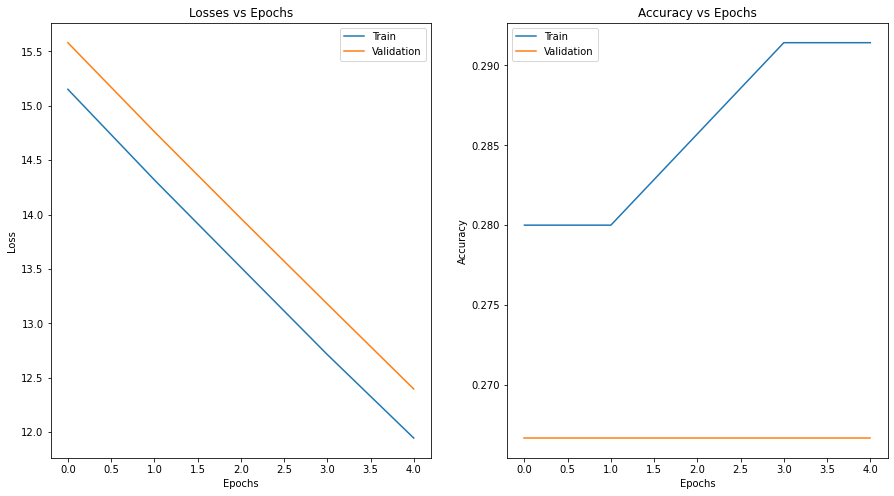

In [ ]:
# TODO
# call draw_chart()
draw_chart(under_history)
# Loss train tiếp thì xuống tiếp
# Accu train tiếp thì luẩn quẩn 0.3

### Overfit model

**Define model**

In [ ]:
# Method 2:
def create_overfit_model(input_shape, layers):
  input = Input(shape=input_shape)
  dense = input
  for index, layer in enumerate(layers): # nhanh hơn # có enumerate nó trả ra value, giữ mỗi layer trong for loop (thay vì index)
    dense = Dense(layer, activation='relu')(dense)
  output = Dense(1, activation='sigmoid')(dense)
  model = Model(input, output)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
  return model

In [ ]:
# Method 1:
# def create_overfit_model(input_shape, layers):
#   model = Sequential()
#   model.add(Input(shape=X.shape[1:]))
#   for layer in layers:
#     model.add(Dense(layer, activation='relu'))
#   model.add(Dense(1, activation='sigmoid')) # 1 class thì sigmoid 
#   model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy') # 2 classes input thì binary crossentropy (for classification)
#   return model

In [ ]:
layers = [32, 32, 32]

**Create model and start training**

In [ ]:
# TODO
# 1. call create_overfit_model
# 2. train model on 50 epochs
over_model = create_overfit_model(X_train.shape[1:], layers)
over_history = over_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
6/6 [==============================] - 0s 39ms/step - loss: 0.7590 - accuracy: 0.5143 - val_loss: 0.6972 - val_accuracy: 0.6400
Epoch 2/50
6/6 [==============================] - 0s 25ms/step - loss: 0.6733 - accuracy: 0.7200 - val_loss: 0.6603 - val_accuracy: 0.6667
Epoch 3/50
6/6 [==============================] - 0s 28ms/step - loss: 0.5772 - accuracy: 0.7429 - val_loss: 0.6418 - val_accuracy: 0.6133
Epoch 4/50
6/6 [==============================] - 0s 25ms/step - loss: 0.5783 - accuracy: 0.7371 - val_loss: 0.6199 - val_accuracy: 0.6400
Epoch 5/50
6/6 [==============================] - 0s 28ms/step - loss: 0.5305 - accuracy: 0.7714 - val_loss: 0.6295 - val_accuracy: 0.6667
Epoch 6/50
6/6 [==============================] - 0s 27ms/step - loss: 0.4942 - accuracy: 0.8057 - val_loss: 0.6227 - val_accuracy: 0.6400
Epoch 7/50
6/6 [==============================] - 0s 27ms/step - loss: 0.4870 - accuracy: 0.8343 - val_loss: 0.6230 - val_accuracy: 0.6533
Epoch 8/50
6/6 [===========

**Draw chart**

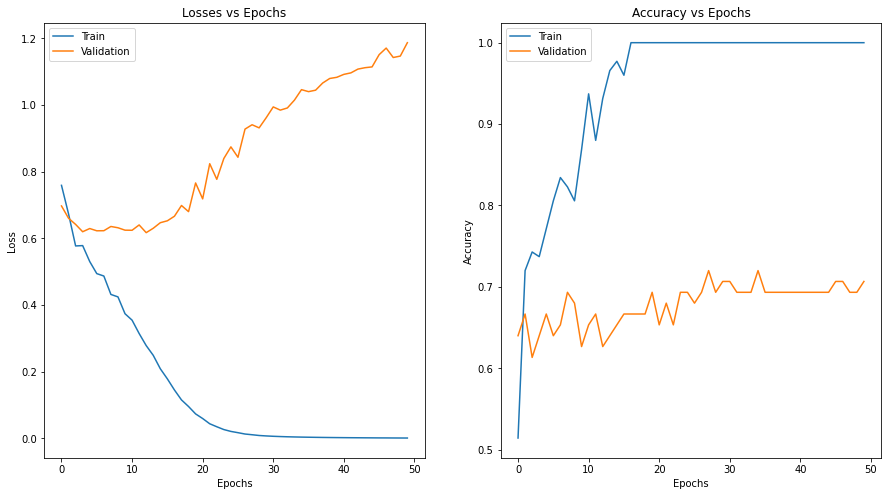

In [ ]:
# TODO
# call draw_chart()
draw_chart(over_history)
# Loss train = 0, Accu train = 1.0 luôn vậy ko tốt do học thuộc lòng
# Loss valid đi lên (học thuộc lòng) vậy là ko tốt

### Adding regularization and Dropout

In [ ]:
from tensorflow.keras.layers import Dropout # dropout là 1 layer
from tensorflow.keras.regularizers import l2 # L2 sum of square sum tất cả weigh rồi square lên
from tensorflow.keras.optimizers import Adam

def create_tuned_model(input_shape, layers):
  print(input_shape)
  input = Input(shape=input_shape)
  dense = input # Dropout sau input cũng đc tuỳ mình
  for index, layer in enumerate(layers):
    dense = Dense(layer, activation='relu', kernel_regularizer=l2(0.001))(dense) # 0.001 là lamda
    dense = Dropout(0.4)(dense) # Dropout layer nào thì để sau layer đó # rớt 40%, giữ 60% 
  output = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))(dense)
  model = Model(input, output)
  optim = Adam(0.01) # Learning Rate = 0.01
  model.compile(loss='binary_crossentropy', optimizer=optim, metrics='accuracy')
  return model

**EarlyStopping Callback**

In [ ]:
# TODO
# 1. call create_tuned_model
# 2. define EarlyStopping callback
# 3. add callback into model.fit
tuned_model = create_tuned_model(X_train.shape[1:], layers)
#val accu: càng ngày càng tăng # val loss càng ngày càng giảm ? # restore: đưa kết quả tốt nhất # patience bài nhỏ thì xài đc, lớn thì DL lâu
#early_stop = EarlyStopping(monitor='val_accuracy', patience=40, restore_best_weights=True)
tuned_history = tuned_model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val)) #callbacks=[early_stop] để sau cùng: truyền vào array
#over_model.summary()

(301,)
Epoch 1/100
6/6 [==============================] - 0s 45ms/step - loss: 3.2184 - accuracy: 0.5371 - val_loss: 1.2703 - val_accuracy: 0.7333
Epoch 2/100
6/6 [==============================] - 0s 27ms/step - loss: 1.2440 - accuracy: 0.7029 - val_loss: 0.6971 - val_accuracy: 0.7333
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 0.9553 - accuracy: 0.5600 - val_loss: 0.7374 - val_accuracy: 0.6933
Epoch 4/100
6/6 [==============================] - 0s 28ms/step - loss: 0.7810 - accuracy: 0.6343 - val_loss: 0.7187 - val_accuracy: 0.7333
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.7899 - accuracy: 0.6571 - val_loss: 0.7165 - val_accuracy: 0.7333
Epoch 6/100
6/6 [==============================] - 0s 28ms/step - loss: 0.7887 - accuracy: 0.7257 - val_loss: 0.7239 - val_accuracy: 0.7333
Epoch 7/100
6/6 [==============================] - 0s 25ms/step - loss: 0.7157 - accuracy: 0.7257 - val_loss: 0.7290 - val_accuracy: 0.7333
Epoch 8/100
6

**Draw chart again**

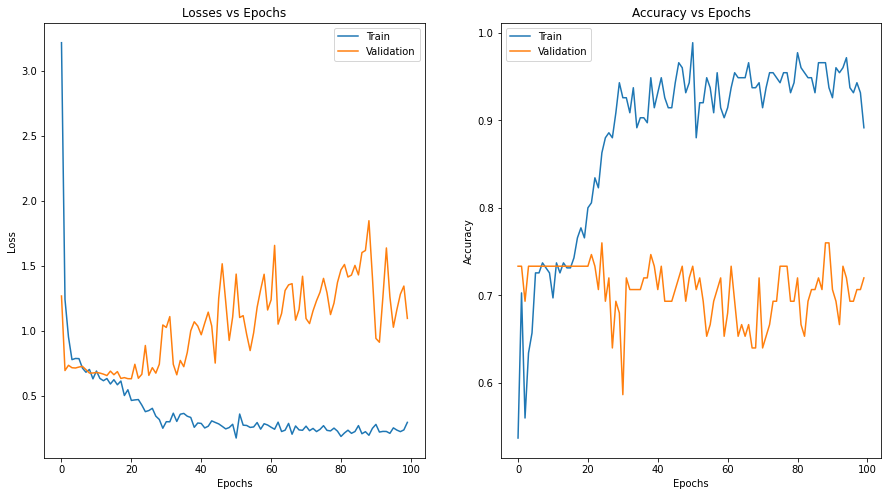

In [ ]:
# TODO
draw_chart(tuned_history)

In [ ]:
# Using EarlyStoppping for tuned_model !!!
from tensorflow.keras.callbacks import EarlyStopping
tuned_model = create_tuned_model(X_train.shape[1:], layers)
#val accu: càng ngày càng tăng # val loss càng ngày càng giảm ? # restore: đưa kết quả tốt nhất # patience bài nhỏ thì xài đc, lớn thì DL lâu
early_stop = EarlyStopping(monitor='val_accuracy', patience=40, restore_best_weights=True)
tuned_history = tuned_model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stop]) # để sau cùng: truyền vào array
#over_model.summary()
# Hình thì gần như đi ngang. Giật do data ít quá

(301,)
Epoch 1/100
6/6 [==============================] - 0s 48ms/step - loss: 3.2413 - accuracy: 0.5829 - val_loss: 0.7202 - val_accuracy: 0.7067
Epoch 2/100
6/6 [==============================] - 0s 29ms/step - loss: 1.5953 - accuracy: 0.5600 - val_loss: 0.7170 - val_accuracy: 0.7333
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 1.0908 - accuracy: 0.6171 - val_loss: 0.7191 - val_accuracy: 0.7333
Epoch 4/100
6/6 [==============================] - 0s 26ms/step - loss: 0.8841 - accuracy: 0.6457 - val_loss: 0.7239 - val_accuracy: 0.7333
Epoch 5/100
6/6 [==============================] - 0s 27ms/step - loss: 0.7825 - accuracy: 0.6914 - val_loss: 0.7332 - val_accuracy: 0.7333
Epoch 6/100
6/6 [==============================] - 0s 26ms/step - loss: 0.7779 - accuracy: 0.6857 - val_loss: 0.7424 - val_accuracy: 0.7333
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.7441 - accuracy: 0.6857 - val_loss: 0.7453 - val_accuracy: 0.7333
Epoch 8/100
6

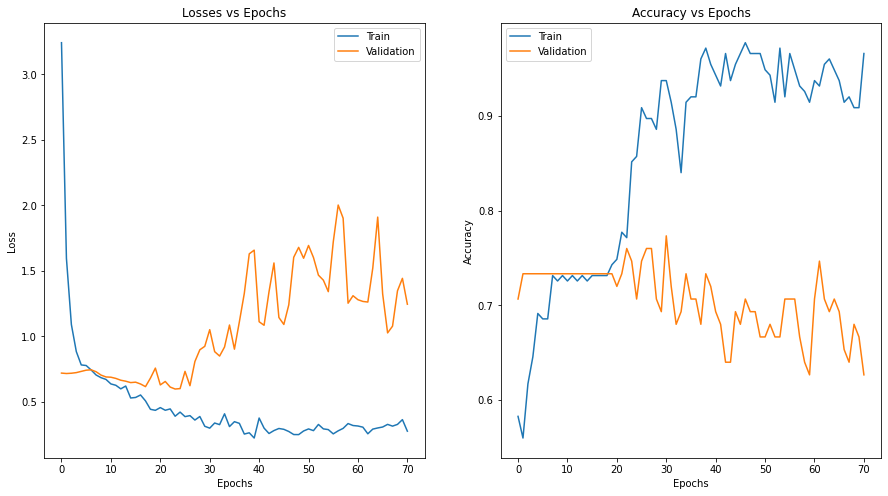

In [ ]:
draw_chart(tuned_history)

In [ ]:
# TODO
# call evaluate on Validation set
tuned_model.evaluate(X_val, y_val)
# COMMENT: Hình dưới: Accuracy đã tăng lên đc hơn 0.7. Giật là do ít data quá, 250 mà còn chia ra
# --->>> Dừng ở epochs ~ 70 thay vì 100 như ở trên

3/3 [==============================] - 0s 2ms/step - loss: 1.0516 - accuracy: 0.7733


[1.0516043901443481, 0.7733333110809326]

**Confusion Matrix**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


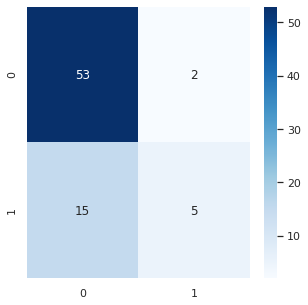

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
# TODO 
# import confusion matrix on sklearn
# use confusion matrix to draw heatmap

y_pred = tuned_model.predict(X_val)
y_pred = np.where(y_pred >= 0.5, 1, 0) # kết quả sigmoid từ 0 tới 1. Số nào lớn hơn 0.5 cho 1 là, còn lại là 0
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
# Predict 0, output: 0 - True : 32
# Predict 1, ouput: 1 - True: 5
# Predict 0, ouput: 1 - False: 2
# Predict 1, outputL 0 - False: 15